<a href="https://colab.research.google.com/github/seelamsettisahithi/amazon-product-reviews-sentiment-analysis/blob/main/Amazon_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
import nltk
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import wordcloud
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

# **Import Data set**

In [2]:
from google.colab import files
  
  
uploaded = files.upload()

Saving camera.csv to camera (2).csv


In [3]:

import pandas as pd
import io
  
df = pd.read_csv(io.BytesIO(uploaded['camera.csv']))
print(df)

      Unnamed: 0  Customer Name  ... Review_length Ratings
0              0          Anand  ...          1623     2.0
1              1       Dipsruti  ...            26     5.0
2              2  Mandar Phatak  ...           212     5.0
3              3        vignesh  ...           375     5.0
4              4        Laxmi P  ...           388     1.0
...          ...            ...  ...           ...     ...
2975        2975      Kamalakar  ...            22     3.0
2976        2976    R SUBBARAJU  ...           103     4.0
2977        2977    venkatpurna  ...            47     5.0
2978        2978    prabhav. k.  ...            48     4.0
2979        2979          sunny  ...           158     5.0

[2980 rows x 6 columns]


In [4]:
df= df.drop(df.columns[[0]], axis=1)

In [5]:
df

,Customer Name,Review Title,Review Content,Review_length,Ratings
0,Anand,Canon 1500D- An upgrade for Point & Shoot Camera,Ok the DSLR Giant Canon have launched 1 more e...,1623,2.0
1,Dipsruti,"Good camera for beginners, must try it!",Good camera for beginners.,26,5.0
2,Mandar Phatak,My first canon ....,Great camera. Perfect product for young buddin...,212,5.0
3,vignesh,Best basic level dslr mainly for wireless remo...,Really impressed with Amazon surprise for deli...,375,5.0
4,Laxmi P,Zero after sales service,You are on your own if you buy this product be...,388,1.0
...,...,...,...,...,...
2975,Kamalakar,Basic DSLR for beginners,Easy to carry n handle,22,3.0
2976,R SUBBARAJU,Nice product,"Fine and good product from Canon, but requires...",103,4.0
2977,venkatpurna,NICE ONE FOR BEGINNERS,THIS CAMERA IS TAKING PICTURES ARE GOOD QUALITY,47,5.0
2978,prabhav. k.,Awsome,Good for beginers.Super picture quality. Like it,48,4.0


In [6]:
data =  df.rename({'Customer Name': 'name', 'Review Title': 'review_title','Review Content':'reviews','Review_length':'review_len','Ratings':'ratings'}, axis=1)  # new method

In [7]:
data.head(5)

,name,review_title,reviews,review_len,ratings
0,Anand,Canon 1500D- An upgrade for Point & Shoot Camera,Ok the DSLR Giant Canon have launched 1 more e...,1623,2.0
1,Dipsruti,"Good camera for beginners, must try it!",Good camera for beginners.,26,5.0
2,Mandar Phatak,My first canon ....,Great camera. Perfect product for young buddin...,212,5.0
3,vignesh,Best basic level dslr mainly for wireless remo...,Really impressed with Amazon surprise for deli...,375,5.0
4,Laxmi P,Zero after sales service,You are on your own if you buy this product be...,388,1.0


In [8]:
data.dtypes

name             object
review_title     object
reviews          object
review_len        int64
ratings         float64
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2980 entries, 0 to 2979
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          2980 non-null   object 
 1   review_title  2980 non-null   object 
 2   reviews       2978 non-null   object 
 3   review_len    2980 non-null   int64  
 4   ratings       2980 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 116.5+ KB


In [10]:
data["ratings"].value_counts(normalize=True)*100

5.0    64.429530
4.0    23.154362
1.0     6.208054
3.0     4.563758
2.0     1.644295
Name: ratings, dtype: float64

In [11]:
ratings = data.groupby(["ratings"]).count()
ratings

,name,review_title,reviews,review_len
ratings,,,,
1.0,185,185,185,185
2.0,49,49,49,49
3.0,136,136,136,136
4.0,690,690,689,690
5.0,1920,1920,1919,1920


# **plot the graphs**(Distribution of ratings)

Text(0, 0.5, 'Count')

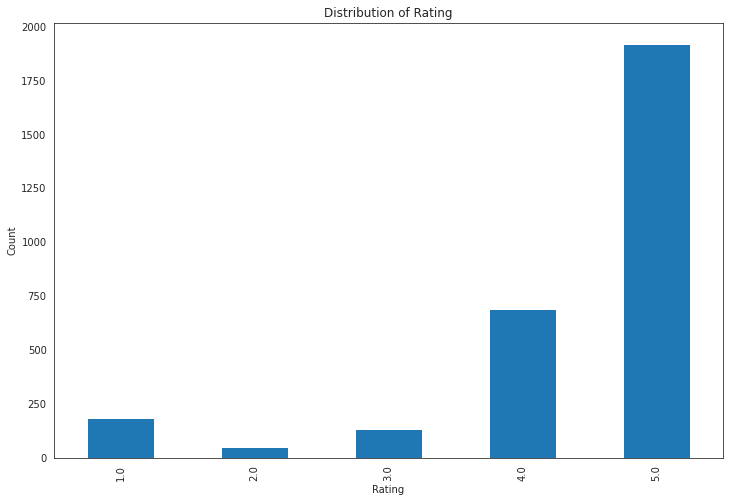

In [12]:
plt.figure(figsize=(12,8))
data['ratings'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')

In [13]:
num=[0,0,0,0,0]
rate=[1,2,3,4,5]
for i in data['ratings']:
  if i==1:
    num[0]= num[0]+1
  if i==2:
    num[1]= num[1]+1
  if i==3:
    num[2]= num[2]+1
  if i==4:
    num[3]= num[3]+1
  if i==5:
    num[4]= num[4]+1
print(num)

[185, 49, 136, 690, 1920]


[185, 49, 136, 690, 1920]


Text(0, 0.5, 'count')

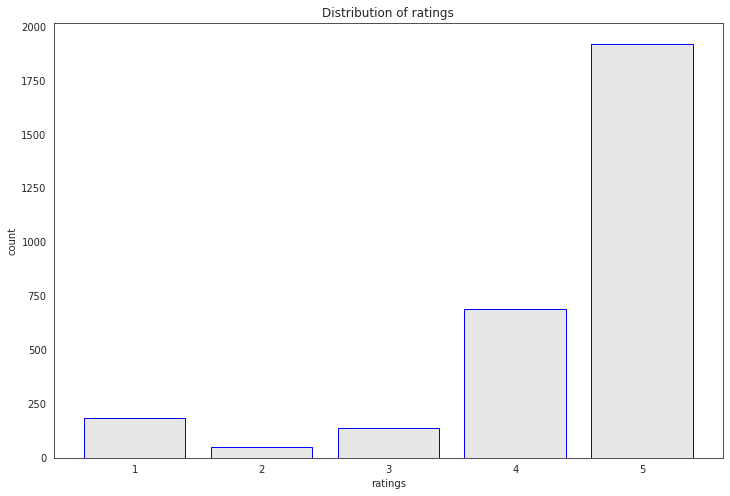

In [14]:
import matplotlib.pyplot as plt
n_rat = [1,2,3,4,5]
print(num)
plt.figure(figsize=[12,8])
plt.bar(x=n_rat, height=num,tick_label = n_rat,  width=0.8,  color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')
plt.title("Distribution of ratings")
plt.xlabel("ratings")
plt.ylabel("count")

Text(0, 0.5, 'Count')

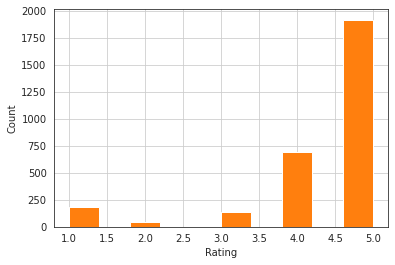

In [15]:
data.ratings.hist()
data.ratings.hist(bins=10)
plt.xlabel('Rating')
plt.ylabel('Count')

# Distribution of review length 

Text(0, 0.5, 'Count')

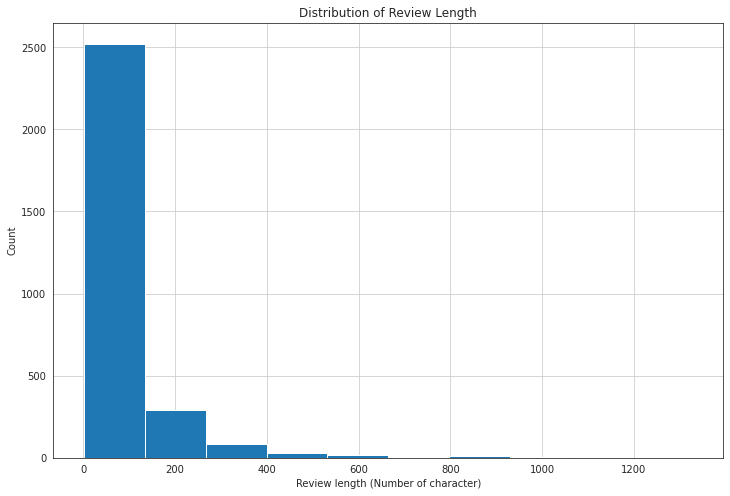

In [16]:
review_length = data["reviews"].dropna().map(lambda x: len(x))
plt.figure(figsize=(12,8))
review_length.loc[review_length < 1500].hist()
plt.title("Distribution of Review Length")
plt.xlabel('Review length (Number of character)')
plt.ylabel('Count')

In [17]:
reviews = data.iloc[:,[2]]

In [18]:
reviews.shape

(2980, 1)

In [19]:
reviews.describe()

,reviews
count,2978
unique,2406
top,Good
freq,151


In [20]:
reviews.head()

,reviews
0,Ok the DSLR Giant Canon have launched 1 more e...
1,Good camera for beginners.
2,Great camera. Perfect product for young buddin...
3,Really impressed with Amazon surprise for deli...
4,You are on your own if you buy this product be...


# **Cleaning the Data**

In [21]:
data.drop(["name","review_title","review_len"],axis=1, inplace =True)

In [22]:
data.head(5)

,reviews,ratings
0,Ok the DSLR Giant Canon have launched 1 more e...,2.0
1,Good camera for beginners.,5.0
2,Great camera. Perfect product for young buddin...,5.0
3,Really impressed with Amazon surprise for deli...,5.0
4,You are on your own if you buy this product be...,1.0


In [45]:
import nltk
import spacy

nlp = spacy.load('en', disable=['parser', 'ner'])

In [46]:
data['reviews'].astype(str)

0       ok dslr giant canon launched entry level dslr ...
1                                   good camera beginners
2       great camera perfect product young budding pho...
3       really impressed amazon surprise delivering wi...
4       buy product canon local service center help ev...
                              ...                        
2975                                  easy carry n handle
2976    fine good product canon requires training clas...
2977                  camera taking pictures good quality
2978              good beginerssuper picture quality like
2979    like image produced night good lacking camera ...
Name: reviews, Length: 2980, dtype: object

In [47]:
## Cleaning the text input for betting understanding of Machine..##

##Converting all review into Lowercase..###
data['reviews'] = data['reviews'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [48]:
## removing punctuation from review..#
import string
data['reviews']=data['reviews'].apply(lambda x:''.join([i for i in x  if i not in string.punctuation]))

In [49]:
## Remove Numbers from review...##
data['reviews']=data['reviews'].str.replace('[0-9]','')

In [50]:
## removing all stopwords(english)....###
from nltk.corpus import stopwords
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [51]:
stop_words=stopwords.words('english')

In [52]:
data['reviews']=data['reviews'].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))

In [53]:
data.head(5)

,reviews,ratings,new_reviews
0,ok dslr giant canon launched entry level dslr ...,2.0,ok the dslr giant canon have launched 1 more e...
1,good camera beginners,5.0,good camera for beginners.
2,great camera perfect product young budding pho...,5.0,great camera. perfect product for young buddin...
3,really impressed amazon surprise delivering wi...,5.0,really impressed with amazon surprise for deli...
4,buy product canon local service center help ev...,1.0,you are on your own if you buy this product be...


# Lemmatization

In [55]:
from textblob import Word
nltk.download("wordnet")
data['reviews']= data['reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [57]:
import re
pattern = r"((?<=^)|(?<= )).((?=$)|(?= ))"
data['reviews']= data['reviews'].apply(lambda x:(re.sub(pattern, '',x).strip()))

In [59]:
data["reviews"].head(5)

0    ok dslr giant canon launched entry level dslr ...
1                                 good camera beginner
2    great camera perfect product young budding pho...
3    really impressed amazon surprise delivering wi...
4    buy product canon local service center help ev...
Name: reviews, dtype: object

# TF-IDF Matrix

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
TFIDF=tfidf.fit_transform(data['reviews'])
print(TFIDF)

  (0, 2053)	0.04463736375758949
  (0, 1240)	0.08300027493377904
  (0, 3494)	0.08300027493377904
  (0, 3577)	0.07607451012283735
  (0, 3279)	0.07607451012283735
  (0, 387)	0.08300027493377904
  (0, 2447)	0.08300027493377904
  (0, 3368)	0.06509743260868064
  (0, 1543)	0.08300027493377904
  (0, 815)	0.07202319741962232
  (0, 3549)	0.06797188471640729
  (0, 796)	0.06509743260868064
  (0, 1786)	0.058596913529346546
  (0, 703)	0.08300027493377904
  (0, 16)	0.062222980500954
  (0, 3584)	0.057371899748866514
  (0, 2013)	0.08300027493377904
  (0, 1399)	0.0432362249161786
  (0, 3524)	0.07202319741962232
  (0, 1790)	0.051039879882699764
  (0, 2035)	0.05384659094080604
  (0, 2926)	0.05529721569001232
  (0, 3405)	0.049355041105501055
  (0, 2135)	0.06509743260868064
  (0, 2371)	0.04121420622020485
  :	:
  (2976, 3171)	0.2900055560971395
  (2976, 565)	0.22584367726496915
  (2977, 2406)	0.38784509588765514
  (2977, 1405)	0.2430834687056558
  (2977, 2626)	0.33662935420975026
  (2977, 3173)	0.7742906505

# Plot Word Cloud

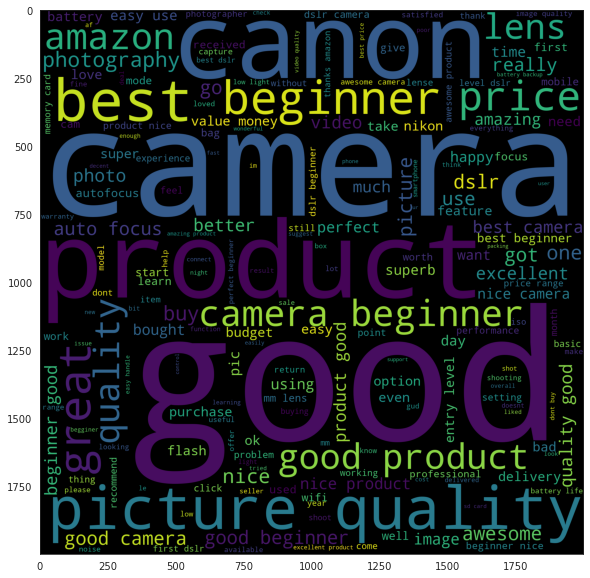

In [62]:
Review_wordcloud = ' '.join(data['reviews'])
Q_wordcloud=WordCloud(
                    background_color='black',
                    width=2000,
                    height=2000
                   ).generate(Review_wordcloud)
fig = plt.figure(figsize = (10, 10))
plt.axis('on')
plt.imshow(Q_wordcloud)

In [63]:
###top 20 most frequent repeated words from Reviews
freq = pd.Series(' '.join(data['reviews']).split()).value_counts()[0:20]
freq

good           1220
camera         1024
beginner        686
product         651
quality         527
best            411
nice            353
picture         329
dslr            264
lens            226
price           225
canon           224
great           221
amazon          202
use             173
awesome         173
buy             166
photography     155
focus           151
easy            149
dtype: int64

# Bi-grams for Reviews

In [73]:
import collections
from collections import Counter
import nltk
from nltk import bigrams
nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [74]:
#Bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [75]:
top2_words = get_top_n2_words(data["reviews"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df

,Bi-gram,Freq
0,picture quality,214
1,camera beginner,141
2,good product,141
3,good beginner,108
4,good camera,104
...,...,...
195,quality excellent,7
196,worth price,7
197,price good,7
198,buying camera,6


# Sentiment Analysis

In [77]:
from textblob import TextBlob
data['polarity'] = data['reviews'].apply(lambda x: TextBlob(x).sentiment[0])
data[['reviews','polarity']].head(5)

,reviews,polarity
0,ok dslr giant canon launched entry level dslr ...,0.127668
1,good camera beginner,0.700000
2,great camera perfect product young budding pho...,0.410000
3,really impressed amazon surprise delivering wi...,0.579167
4,buy product canon local service center help ev...,-0.040000


In [78]:
# Displaying top 5 positive posts of Category_A
data[data.polarity>0].head(5)

,reviews,ratings,new_reviews,polarity
0,ok dslr giant canon launched entry level dslr ...,2.0,ok the dslr giant canon have launched 1 more e...,0.127668
1,good camera beginner,5.0,good camera for beginners.,0.700000
2,great camera perfect product young budding pho...,5.0,great camera. perfect product for young buddin...,0.410000
3,really impressed amazon surprise delivering wi...,5.0,really impressed with amazon surprise for deli...,0.579167
5,request replacement camera main body lot black...,1.0,request for replacement of camera main body th...,0.133333


In [79]:
def sent_type(text): 
    for i in (text):
        if i>0:
            print('positive')
        elif i==0:
            print('neutral')
        else:
            print('negative') 

In [80]:
sent_type(data['polarity'])

positive
positive
positive
positive
negative
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
neutral
positive
positive
positive
positive
negative
positive
neutral
positive
positive
positive
positive
positive
positive
neutral
positive
positive
positive
neutral
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
neutral
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positi

In [81]:
data["category"]=data['polarity']

In [82]:
data.loc[data.category > 0,'category']="Positive"
data.loc[data.category !='Positive','category']="Negative"

In [84]:
data["category"]=data["category"].astype('category')
data.dtypes

reviews          object
ratings         float64
new_reviews      object
polarity        float64
category       category
dtype: object

# Count plot of positive and Neagtive words

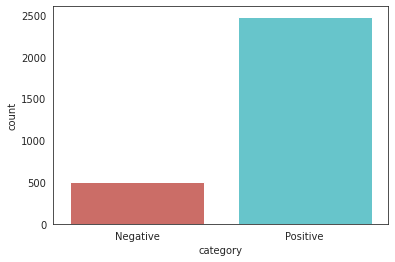

In [85]:
sns.countplot(x='category',data=data,palette='hls')

In [86]:
data["category"].describe()

count         2980
unique           2
top       Positive
freq          2479
Name: category, dtype: object

In [87]:
data["category"].value_counts()

Positive    2479
Negative     501
Name: category, dtype: int64

# Positive & Neagtive word Cloud

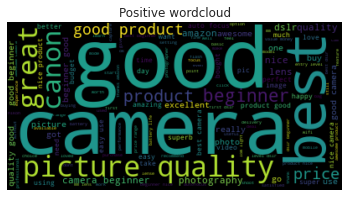

In [89]:
positive_reviews= data[data.category=='Positive']
positive_reviews_text=" ".join(positive_reviews.reviews.to_numpy().tolist())
positive_reviews_cloud=WordCloud(background_color='black',max_words=150).generate(positive_reviews_text)
plt.imshow(positive_reviews_cloud, interpolation='bilinear')
plt.title("Positive wordcloud")
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()

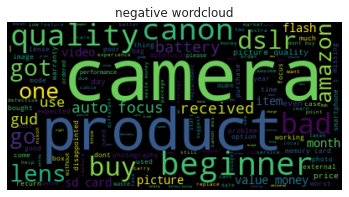

In [91]:
negative_reviews= data[data.category=='Negative']
negative_reviews_text=" ".join(negative_reviews.reviews.to_numpy().tolist())
negative_reviews_cloud=WordCloud(background_color='black',max_words=150).generate(negative_reviews_text)
plt.imshow(negative_reviews_cloud,interpolation='bilinear')
plt.title("negative wordcloud")
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()
